In [1]:
from desc import set_device
set_device("gpu")

/home/fcastro/DESC/desc/__init__.py:98: UserWarning: No GPU found, falling back to CPU
  warnings.warn(colored("No GPU found, falling back to CPU", "yellow"))


In [1]:
import numpy as np
import os

from scipy.io import netcdf_file
import copy
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.constants import mu_0
import sys
import functools
import pickle

import jax
import jax.numpy as jnpå
from jax import jit, jacfwd

from netCDF4 import Dataset
import h5py

from desc.backend import put, fori_loop, jnp, sign

from desc.basis import FourierZernikeBasis, DoubleFourierSeries, FourierSeries

from desc.equilibrium import EquilibriaFamily, Equilibrium
from desc.grid import ConcentricGrid, LinearGrid, Grid, QuadratureGrid
from desc.io import InputReader, load
from desc.objectives import *
from desc.objectives.objective_funs import _Objective
from desc.plotting import plot_1d, plot_2d, plot_3d, plot_section, plot_surfaces, plot_comparison

from desc.plotting import *

from desc.transform import Transform
from desc.vmec import VMECIO
from desc.derivatives import Derivative
from desc.geometry import FourierRZToroidalSurface
from desc.profiles import SplineProfile, PowerSeriesProfile

from desc.magnetic_fields import ( SplineMagneticField, 
                                  FourierCurrentPotentialField, ToroidalMagneticField,
                                  field_line_integrate)

import desc.examples

from desc.backend import fori_loop, jit, jnp, odeint, sign
from desc.compute import rpz2xyz, rpz2xyz_vec, xyz2rpz, xyz2rpz_vec

from desc.utils import flatten_list, Timer, copy_coeffs, errorif, setdefault, svd_inv_null, warnif, cross, dot
import numpy as np
from numpy import ndarray

from desc.fns_simp import (plot_figure,
                           plot_figure2,
                           plot_xy,
                           surf_int,
                           _compute_magnetic_field_from_Current)

DESC version 0.12.3+553.gcb761a802.dirty,using JAX backend, jax version=0.4.35, jaxlib version=0.4.34, dtype=float64
Using device: CPU, with 108.90 GB available memory


In [34]:
# Numer of dipoles
sMv = np.asarray([30,])
#sNv = np.asarray([5,10,15,20,25,30,35,40,45,])
#sNv = np.asarray([25,30,35,40,45,50,55])
sNv = np.asarray([40,45,50,55])

In [35]:
b_chi = []
bn_chi = []
source_chi = [] # Store the sum of sinks and sources of current
max_I = []
min_I = []

for i in range(0,len(sNv)):

    p_M = sMv[0]
    p_N = sNv[i]

    
    soln = np.load('soln_M_' + str(p_M) + '_N_' + str(p_N) + '.npy')
    error = np.load('error_M_' + str(p_M) + '_N_' + str(p_N) + '.npy')
    bn = np.load('maxbn_M_' + str(p_M) + '_N_' + str(p_N) + '.npy')
        
    #G_chi.append(soln[-1])
    b_chi.append(error)
    bn_chi.append(bn)
    max_I.append(max(abs(soln)))
    min_I.append(min(abs(soln)))

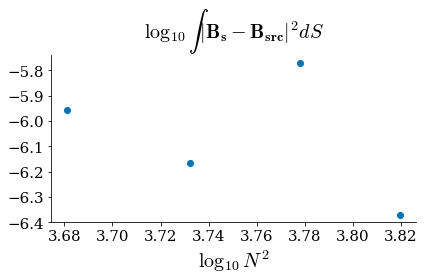

In [36]:
plot_xy(np.log10(b_chi), 
        np.log10( ( sMv[0] * 2 + 0) * ( sNv * 2 + 0 ) ), # grid to plot on
        ''r'$\log_{10} \int | \mathbf{B_s - B_{src}} | ^2 dS$', # title for the figure
        ''r'$\log_{10} N^2 $', # title of x axis
       )

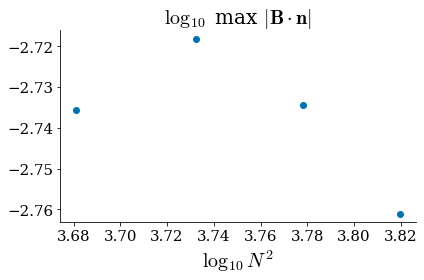

In [37]:
plot_xy(np.log10(bn_chi), 
        np.log10( ( sMv * 2 + 0) * ( sNv * 2 + 0 ) ), # grid to plot on
        ''r'$\log_{10} $ max $| \mathbf{B\cdot n} | $', # title for the figure
        ''r'$\log_{10} N^2 $', # title of x axis
       )

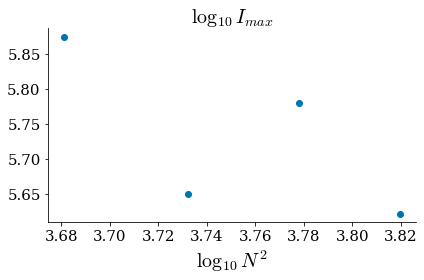

In [38]:
plot_xy(np.log10(abs(jnp.asarray(max_I))), 
        np.log10(( sMv[0] * 2 + 0 ) * ( sNv * 2 + 0 ) ), # grid to plot on
        ''r'$\log_{10} I_{max} $', # title for the figure
        ''r'$\log_{10} N^2 $', # title of x axis
       )

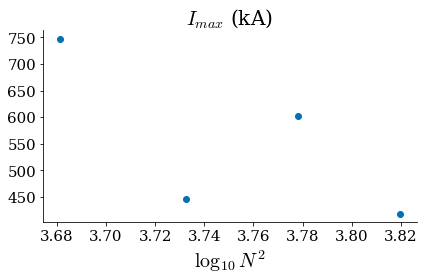

In [39]:
plot_xy(jnp.asarray(max_I) * 1e-3, 
        np.log10(( sMv[0] * 2 + 0 ) * ( sNv * 2 + 0 ) ), # grid to plot on
        ''r'$ I_{max} $ (kA)', # title for the figure
        ''r'$\log_{10} N^2 $', # title of x axis
       )

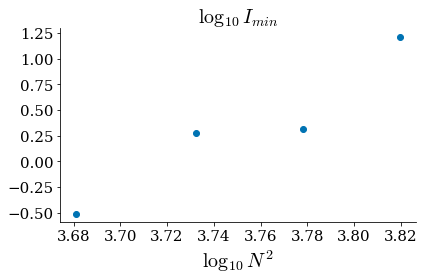

In [40]:
plot_xy(np.log10(abs(jnp.asarray(min_I))), 
        np.log10(( sMv[0] * 2 + 0 ) * ( sNv * 2 + 0 ) ), # grid to plot on
        ''r'$\log_{10} I_{min} $', # title for the figure
        ''r'$\log_{10} N^2 $', # title of x axis
       )

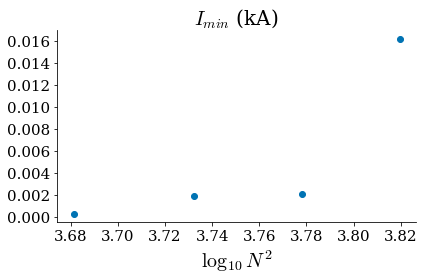

In [41]:
plot_xy(jnp.asarray(min_I) * 1e-3, 
        np.log10(( sMv[0] * 2 + 0 ) * ( sNv * 2 + 0 ) ), # grid to plot on
        ''r'$ I_{min} $ (kA)', # title for the figure
        ''r'$\log_{10} N^2 $', # title of x axis
       )